<a href="https://colab.research.google.com/github/IvanKatorgin/Feature-Engineering/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B0%D0%BC%D0%B8_%D0%B8_%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курс "Работа с признаками и построение моделей". Домашнее задание 8. Поиск выбросов и генерация новых признаков. Каторгин И.П.

## Описание задания

В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта https://www.kaggle.com/uciml/glass. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

Этапы работы:
1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
2. Проведите первичный анализ.

а) Проверьте количество записей для каждого класса. Сделайте вывод.
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.
5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).
6. Обработайте выбросы в данных.

а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?

b) Исследуйте признаки на выбросы несколькими способами.

c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.
7. Повторите п. 4, п. 5.
8. Сформулируйте выводы по проделанной работе.

а) Кратко опишите, какие преобразования были сделаны с данными.

b) Сравните точность двух моделей.

c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

## Получите данные и загрузите их в рабочую среду

In [125]:
# загрузим необходимые библиотеки
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, scipy.stats as st
from matplotlib import colors
import matplotlib.font_manager
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_curve, auc, roc_auc_score, mean_squared_error, r2_score, make_scorer, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier, BaggingRegressor, BaggingClassifier, StackingRegressor, StackingClassifier, IsolationForest
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor, LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import LinearSVC, OneClassSVM
from sklearn.cluster import DBSCAN
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from google.colab import files

In [126]:
! pip install -q kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ivankatorgin","key":"d444d549b2d6da9f7419ddd8dcb00354"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset        11KB  2024-09-28 20:21:12          13891        304  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                         22KB  2024-10-06 11:27:38           7295        116  1.0              
yusufdelikkaya/datascience-salaries-2024                     Data Science Salaries 2024                           69KB  2024-10-23 18:39:50           1091         28  0.88235295       
lainguyn123/student-performance-factors                      Student Perfor

In [127]:
! kaggle datasets download uciml/glass

Dataset URL: https://www.kaggle.com/datasets/uciml/glass
License(s): DbCL-1.0
glass.zip: Skipping, found more recently modified local copy (use --force to force download)


In [128]:
# проверка
! unzip -l glass.zip

Archive:  glass.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
    10053  2019-09-20 06:54   glass.csv
---------                     -------
    10053                     1 file


In [129]:
# загрузка
! unzip glass.zip

Archive:  glass.zip
replace glass.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: glass.csv               


In [130]:
# прочитаем данные
df = pd.read_csv('glass.csv', sep=',', encoding='utf-8')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Проведите первичный анализ

In [131]:
df.shape

(214, 10)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [133]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [134]:
df.isna().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


а) Проверьте количество записей для каждого класса. Сделайте вывод

In [135]:
# проверим количество записей для каждого класса
df['Type'].value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


Выводы:
- пропусков в данных не обнаружено
- самые распространенные типы стекла - 2 и 1
- тип стекла 4 отсутствует в данных

## Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое

In [136]:
# целевой признак - Type
X = df.drop(['Type'], axis=1)
y = df['Type']

In [137]:
# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
X_train.shape

(171, 9)

In [139]:
X_test.shape

(43, 9)

## Обучите модель дерева решений RandomForestClassifier на обучающем множестве

In [140]:
# обучим модель дерева решений random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

## Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy)

In [141]:
y_pred = rfc.predict(X_test)

In [142]:
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 5, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 7, 2, 7, 1])

In [143]:
# посчитаем точность
accuracy_score(y_test, y_pred)

0.8604651162790697

## Обработайте выбросы в данных

In [144]:
# проверим количество уникальных значений
def unique_count(df):
  for col in df.columns:
    print(f'{col} - {df[col].nunique()}')

In [145]:
unique_count(df)

RI - 178
Na - 142
Mg - 94
Al - 118
Si - 133
K - 65
Ca - 143
Ba - 34
Fe - 32
Type - 6


In [146]:
# посмотрим на уникальные значения
def unique_values(df):
  for col in df.columns:
    print(df[col].value_counts())

In [147]:
unique_values(df)

RI
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64
Na
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64
Mg
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64
Al
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: count, Length: 118, dtype: int64
Si
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: count, Length: 133, dtype: int64
K
0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: count, Length: 65, dtype: int64
Ca
8.03    5
8

а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?

Построим несколько графиков

In [148]:
# построим несколько графиков
def get_displot(X, columns=[]):
  for i in columns:
    sns.set(rc={"figure.figsize": (8, 4)})
    sns.displot(X[i])
    plt.gca().spines[['top', 'right',]].set_visible(False)

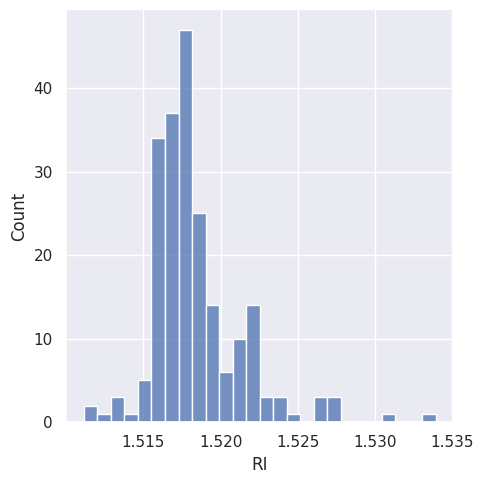

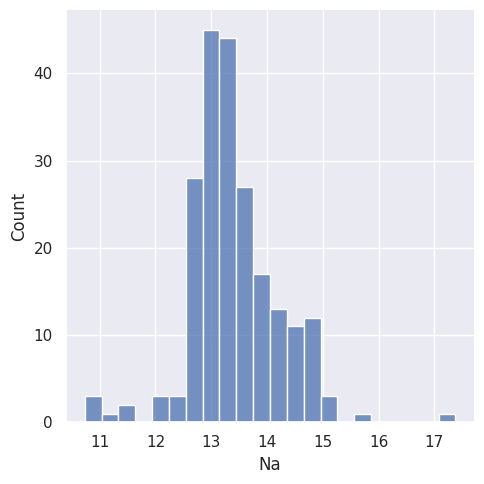

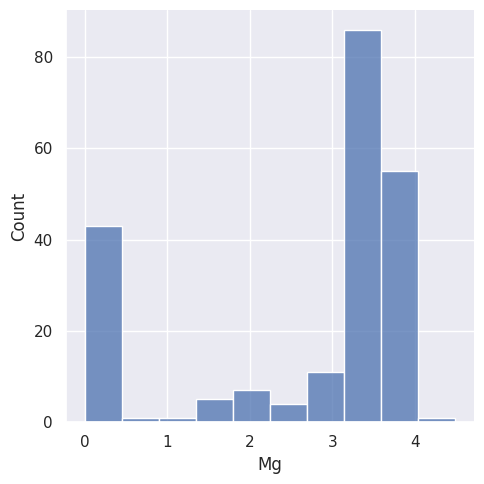

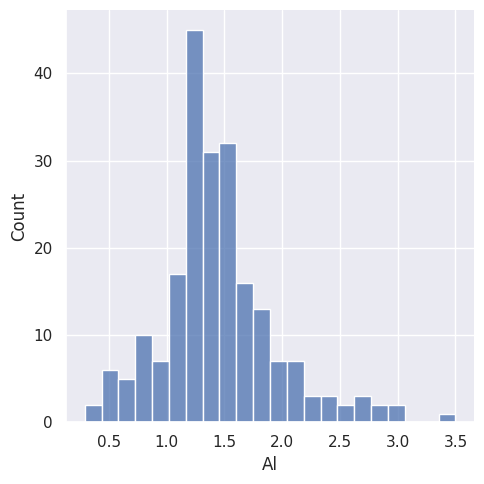

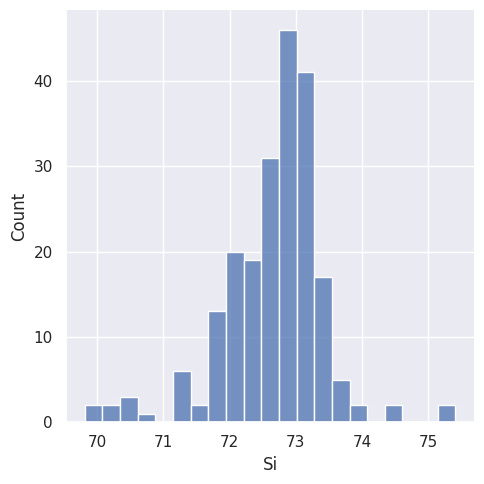

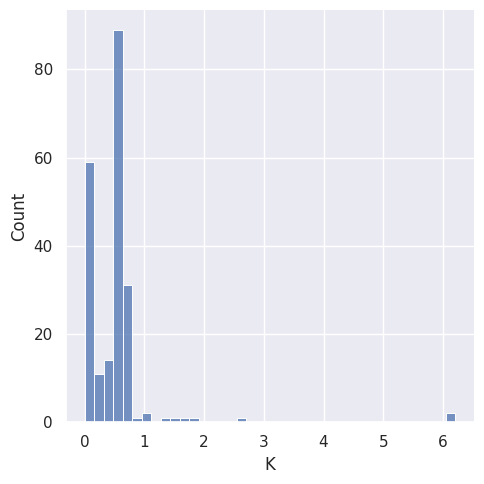

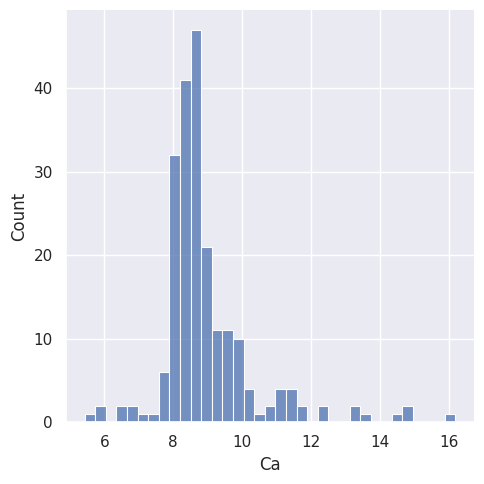

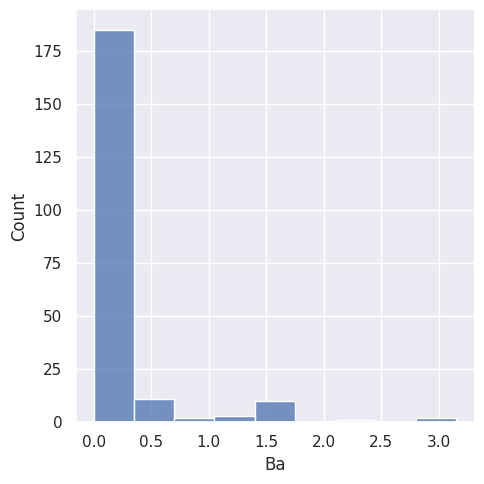

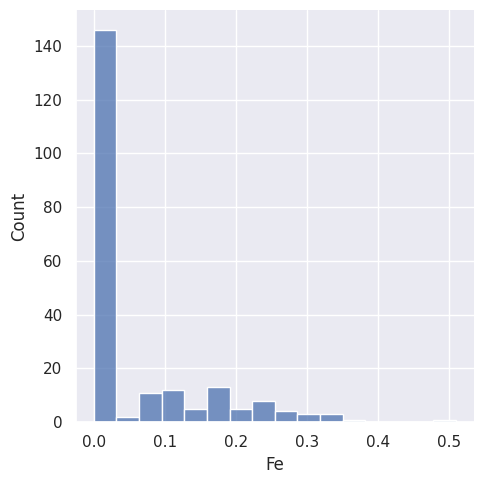

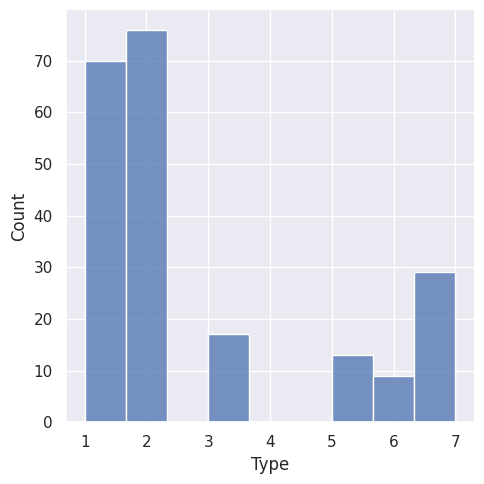

In [149]:
get_displot(df, ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])

Признаки 'RI', 'Na', 'Al', 'Si', имеют тенденцию к нормальному распределению

Признаки 'K', 'Ca', 'Ba', 'Fe' имеют тенденцию к логнормальному распределению

Признак 'Mg' имеет двойное (двугорбное) распределение

In [150]:
# посроим несколько бокслотов
def get_boxplot(X, columns=[]):
  for i in columns:
    fig, axes = plt.subplots(1, 1, figsize=(8, 2))
    sns.boxplot(x=X[i])

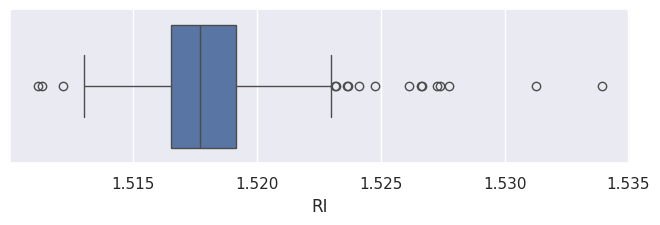

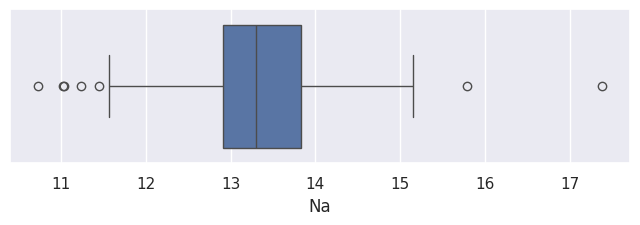

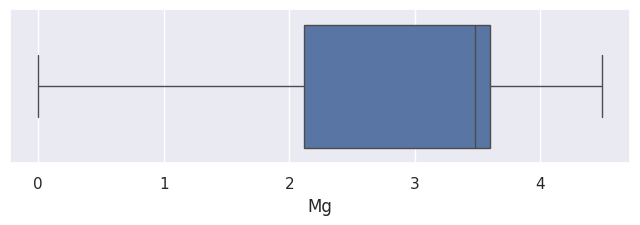

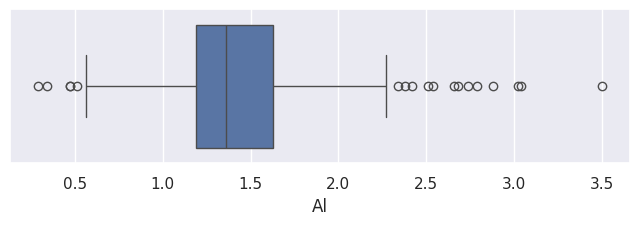

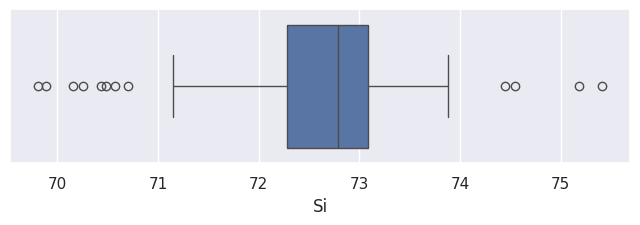

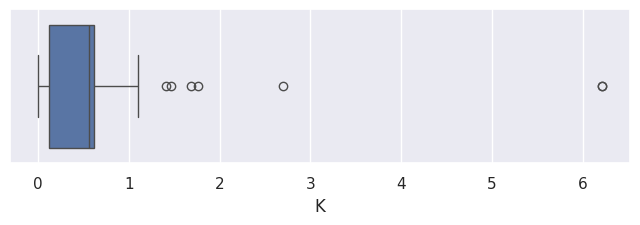

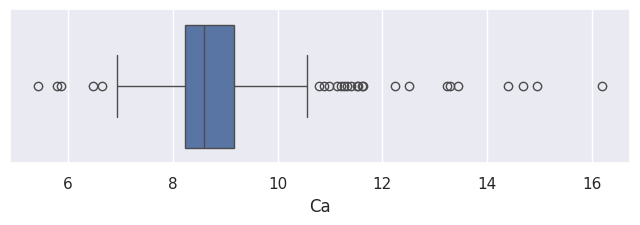

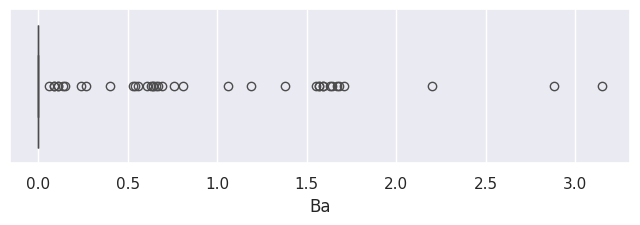

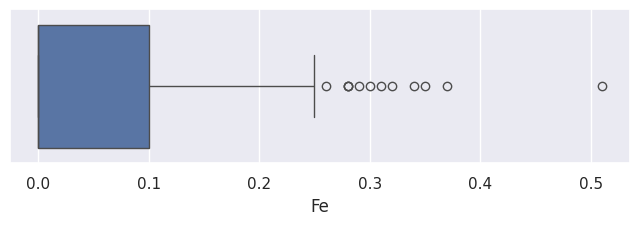

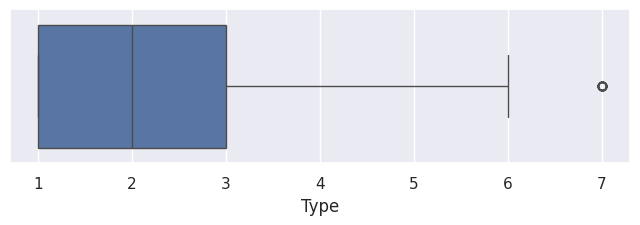

In [151]:
get_boxplot(df, ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])

По построенным боксплотам отмечается, что у всех признаков, за исключением 'Mg', имеются выбросы.

Предлагается посмотреть на признаки, которые выходят на границы усов в таблице, за исключением Ba, по Ba выбросы трудно определяются, так как исходя из бокспллота, выбросами являются практически все значения

In [166]:
# посмотрим на значения признаков больше верхнего уса боксплота:
def up_unique (df, columns=[]):
  for i in columns:
    print(i)
    print(df[df[i] > (df[i].quantile(0.75) + 1.5 * (df[i].quantile(0.75) - df[i].quantile(0.25)))])

In [169]:
up_unique(df, ['RI', 'Na', 'Al', 'Si', 'K', 'Ca', 'Fe'])

RI
          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
47   1.52667  13.99  3.70  0.71  71.57  0.02   9.82  0.00  0.10     1
50   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.00  0.16     1
103  1.52725  13.80  3.15  0.66  70.57  0.08  11.64  0.00  0.00     2
104  1.52410  13.83  2.90  1.17  71.15  0.08  10.79  0.00  0.00     2
105  1.52475  11.45  0.00  1.88  72.19  0.81  13.24  0.00  0.34     2
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28     2
107  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24     2
110  1.52664  11.23  0.00  0.77  73.21  0.00  14.68  0.00  0.00     2
111  1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00     2
112  1.52777  12.64  0.00  0.67  72.02  0.06  14.40  0.00  0.00     2
131  1.52614  13.70  0.00  1.36  71.24  0.19  13.44  0.00  0.10     2
170  1.52369  13.44  0.00  1.58  72.22  0.32  12.24  0.00  0.00     5
187  1.52315  13.44  3.34  1.23  72.38  0.60   8.83  0.00  0.00     7
189  1.52365  15.

In [170]:
# посмотрим на значения признаков меньше нижнего уса боксплота:
def down_unique (df, columns=[]):
  for i in columns:
    print(i)
    print(df[df[i] < (df[i].quantile(0.25) - 1.5 * (df[i].quantile(0.75) - df[i].quantile(0.25)))])

In [171]:
down_unique(df, ['RI', 'Na', 'Al', 'Si', 'Ca'])

RI
          RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  Type
56   1.51215  12.99  3.47  1.12  72.98  0.62  8.35  0.00  0.31     1
184  1.51115  17.38  0.00  0.34  75.41  0.00  6.65  0.00  0.00     6
185  1.51131  13.69  3.20  1.81  72.81  1.76  5.43  1.19  0.00     7
Na
          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe  Type
105  1.52475  11.45  0.00  1.88  72.19  0.81  13.24  0.00  0.34     2
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28     2
110  1.52664  11.23  0.00  0.77  73.21  0.00  14.68  0.00  0.00     2
111  1.52739  11.02  0.00  0.75  73.08  0.00  14.96  0.00  0.00     2
166  1.52151  11.03  1.71  1.56  73.44  0.58  11.62  0.00  0.00     5
Al
          RI     Na    Mg    Al     Si     K     Ca   Ba    Fe  Type
21   1.51966  14.77  3.75  0.29  72.02  0.03   9.00  0.0  0.00     1
38   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.0  0.00     1
39   1.52213  14.21  3.82  0.47  71.77  0.11   9.57  0.0  0.00     1
50   1.52320  13.72

Возможно значения признаков, выходящие из верхних и нижних границ усов - выбросы. Для того, чтобы окончательно в этом убедиться проверим признаки на выбросы другими методами

b) Исследуйте признаки на выбросы несколькими способами

In [156]:
# создадим матрицу по двум признакам
X1 = np.array(df[['Na', 'Mg']])
X1

array([[13.64,  4.49],
       [13.89,  3.6 ],
       [13.53,  3.55],
       [13.21,  3.69],
       [13.27,  3.62],
       [12.79,  3.61],
       [13.3 ,  3.6 ],
       [13.15,  3.61],
       [14.04,  3.58],
       [13.  ,  3.6 ],
       [12.72,  3.46],
       [12.8 ,  3.66],
       [12.88,  3.43],
       [12.86,  3.56],
       [12.61,  3.59],
       [12.81,  3.54],
       [12.68,  3.67],
       [14.36,  3.85],
       [13.9 ,  3.73],
       [13.02,  3.54],
       [12.82,  3.55],
       [14.77,  3.75],
       [12.78,  3.62],
       [12.81,  3.57],
       [13.38,  3.5 ],
       [12.98,  3.54],
       [13.21,  3.48],
       [12.87,  3.48],
       [12.56,  3.52],
       [13.08,  3.49],
       [12.65,  3.56],
       [12.84,  3.5 ],
       [12.85,  3.48],
       [12.57,  3.47],
       [12.69,  3.54],
       [13.29,  3.45],
       [13.89,  3.53],
       [12.74,  3.48],
       [14.21,  3.82],
       [14.21,  3.82],
       [12.79,  3.5 ],
       [12.71,  3.42],
       [13.21,  3.39],
       [13.

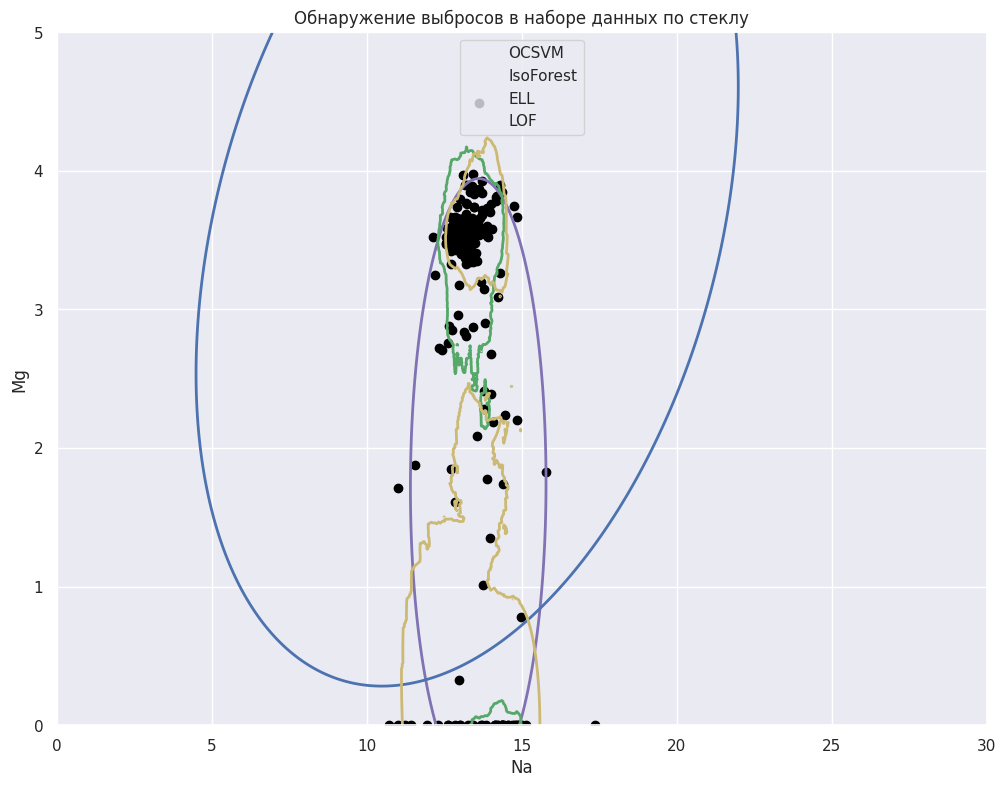

Получаем разделяющую поверхность, где видны выбросы данных


In [157]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause
classifiers = {
    "OCSVM": OneClassSVM(nu=0.1), # nu - % выбросов
    "IsoForest": IsolationForest(),
    "ELL": EllipticEnvelope(contamination=0.2),
    "LOF": LocalOutlierFactor(novelty=True)
}
colors = ['m', 'g', 'b', 'y']
legend1 = {}
legend2 = {}


# Выделяем границы обнаружения выбросов с помощью нескольких классификаторов
# метод meshgrid используется для красивой отрисовки
xx1, yy1 = np.meshgrid(np.linspace(0, 30, 500), np.linspace(0, 5, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1, figsize=(12,9))
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Отрисовка результатов (= форма облака точек данных)
plt.figure(1, figsize=(12,9))  # 2 кластера
plt.title("Обнаружение выбросов в наборе данных по стеклу")
plt.scatter(X1[:, 0], X1[:, 1], color='black')

plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0], legend1_values_list[1].collections[0], legend1_values_list[2].collections[0], legend1_values_list[3].collections[0],),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2], legend1_keys_list[3],),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.ylabel('Mg')
plt.xlabel('Na')
plt.show()
print('Получаем разделяющую поверхность, где видны выбросы данных')

Явных выбросов в этих двух признаках не обнаружено

Попробуем другие признаки

In [160]:
# создадим матрицу по двум признакам
X1 = np.array(df[['Al', 'Si']])
X1

array([[ 1.1 , 71.78],
       [ 1.36, 72.73],
       [ 1.54, 72.99],
       [ 1.29, 72.61],
       [ 1.24, 73.08],
       [ 1.62, 72.97],
       [ 1.14, 73.09],
       [ 1.05, 73.24],
       [ 1.37, 72.08],
       [ 1.36, 72.99],
       [ 1.56, 73.2 ],
       [ 1.27, 73.01],
       [ 1.4 , 73.28],
       [ 1.27, 73.21],
       [ 1.31, 73.29],
       [ 1.23, 73.24],
       [ 1.16, 73.11],
       [ 0.89, 71.36],
       [ 1.18, 72.12],
       [ 1.69, 72.73],
       [ 1.49, 72.75],
       [ 0.29, 72.02],
       [ 1.29, 72.79],
       [ 1.35, 73.02],
       [ 1.15, 72.85],
       [ 1.21, 73.  ],
       [ 1.41, 72.64],
       [ 1.33, 73.04],
       [ 1.43, 73.15],
       [ 1.28, 72.86],
       [ 1.3 , 73.08],
       [ 1.14, 73.27],
       [ 1.23, 72.97],
       [ 1.38, 73.39],
       [ 1.34, 72.95],
       [ 1.21, 72.74],
       [ 1.32, 71.81],
       [ 1.35, 72.96],
       [ 0.47, 71.77],
       [ 0.47, 71.77],
       [ 1.12, 73.03],
       [ 1.2 , 73.2 ],
       [ 1.33, 72.76],
       [ 0.

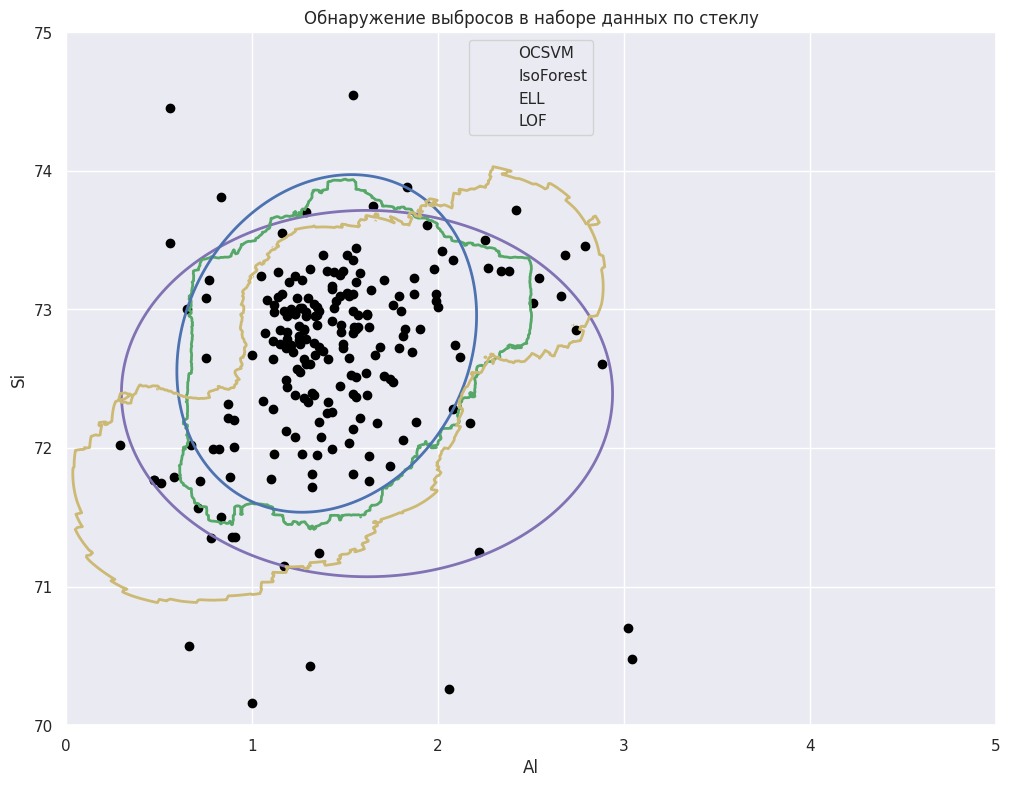

Получаем разделяющую поверхность, где видны выбросы данных


In [161]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause
classifiers = {
    "OCSVM": OneClassSVM(nu=0.1), # nu - % выбросов
    "IsoForest": IsolationForest(),
    "ELL": EllipticEnvelope(contamination=0.2),
    "LOF": LocalOutlierFactor(novelty=True)
}
colors = ['m', 'g', 'b', 'y']
legend1 = {}
legend2 = {}


# Выделяем границы обнаружения выбросов с помощью нескольких классификаторов
# метод meshgrid используется для красивой отрисовки
xx1, yy1 = np.meshgrid(np.linspace(0, 5, 500), np.linspace(70, 75, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1, figsize=(12,9))
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Отрисовка результатов (= форма облака точек данных)
plt.figure(1, figsize=(12,9))  # 2 кластера
plt.title("Обнаружение выбросов в наборе данных по стеклу")
plt.scatter(X1[:, 0], X1[:, 1], color='black')

plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0], legend1_values_list[1].collections[0], legend1_values_list[2].collections[0], legend1_values_list[3].collections[0],),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2], legend1_keys_list[3],),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.ylabel('Si')
plt.xlabel('Al')
plt.show()
print('Получаем разделяющую поверхность, где видны выбросы данных')

Имеются выбросы, попробуем их удалить

Попробуем другие признаки

In [162]:
# создадим матрицу по двум признакам
X1 = np.array(df[['K', 'Ca']])
X1

array([[ 0.06,  8.75],
       [ 0.48,  7.83],
       [ 0.39,  7.78],
       [ 0.57,  8.22],
       [ 0.55,  8.07],
       [ 0.64,  8.07],
       [ 0.58,  8.17],
       [ 0.57,  8.24],
       [ 0.56,  8.3 ],
       [ 0.57,  8.4 ],
       [ 0.67,  8.09],
       [ 0.6 ,  8.56],
       [ 0.69,  8.05],
       [ 0.54,  8.38],
       [ 0.58,  8.5 ],
       [ 0.58,  8.39],
       [ 0.61,  8.7 ],
       [ 0.15,  9.15],
       [ 0.06,  8.89],
       [ 0.54,  8.44],
       [ 0.54,  8.52],
       [ 0.03,  9.  ],
       [ 0.59,  8.7 ],
       [ 0.62,  8.59],
       [ 0.5 ,  8.43],
       [ 0.65,  8.53],
       [ 0.59,  8.43],
       [ 0.56,  8.43],
       [ 0.57,  8.54],
       [ 0.6 ,  8.49],
       [ 0.61,  8.69],
       [ 0.56,  8.55],
       [ 0.61,  8.56],
       [ 0.6 ,  8.55],
       [ 0.57,  8.75],
       [ 0.56,  8.57],
       [ 0.51,  8.78],
       [ 0.64,  8.68],
       [ 0.11,  9.57],
       [ 0.11,  9.57],
       [ 0.64,  8.77],
       [ 0.59,  8.64],
       [ 0.59,  8.59],
       [ 0.

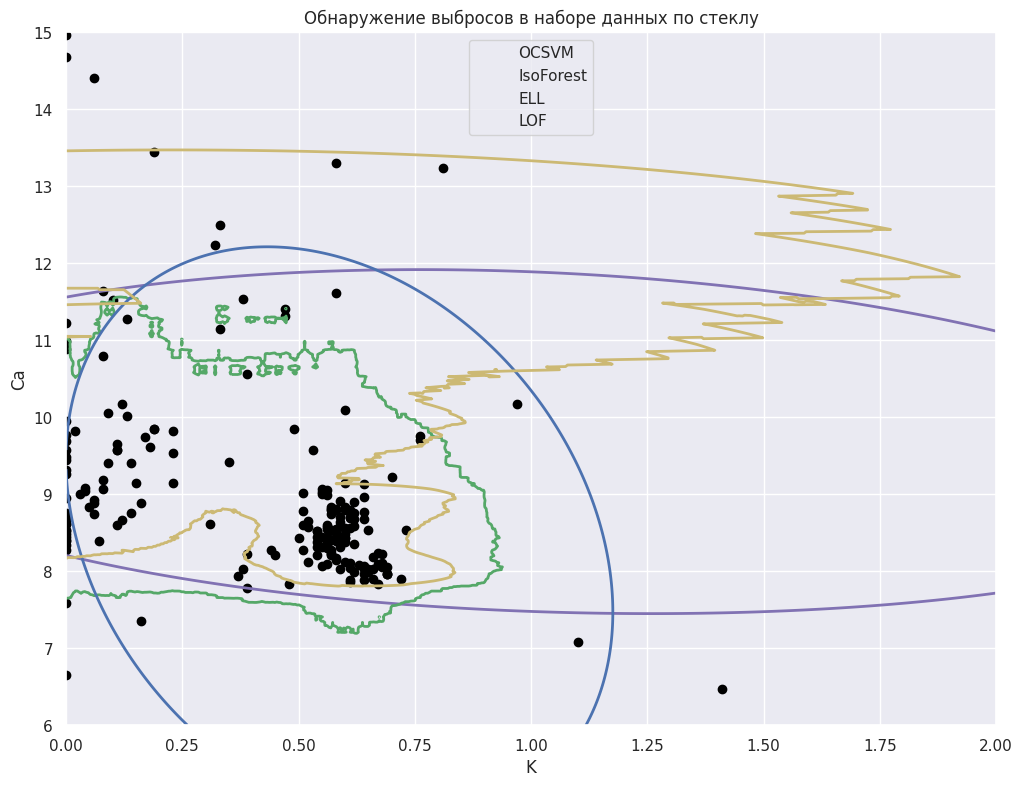

Получаем разделяющую поверхность, где видны выбросы данных


In [163]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause
classifiers = {
    "OCSVM": OneClassSVM(nu=0.1), # nu - % выбросов
    "IsoForest": IsolationForest(),
    "ELL": EllipticEnvelope(contamination=0.2),
    "LOF": LocalOutlierFactor(novelty=True)
}
colors = ['m', 'g', 'b', 'y']
legend1 = {}
legend2 = {}


# Выделяем границы обнаружения выбросов с помощью нескольких классификаторов
# метод meshgrid используется для красивой отрисовки
xx1, yy1 = np.meshgrid(np.linspace(0, 2, 500), np.linspace(6, 15, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1, figsize=(12,9))
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Отрисовка результатов (= форма облака точек данных)
plt.figure(1, figsize=(12,9))  # 2 кластера
plt.title("Обнаружение выбросов в наборе данных по стеклу")
plt.scatter(X1[:, 0], X1[:, 1], color='black')

plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0], legend1_values_list[1].collections[0], legend1_values_list[2].collections[0], legend1_values_list[3].collections[0],),
           (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2], legend1_keys_list[3],),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.ylabel('Ca')
plt.xlabel('K')
plt.show()
print('Получаем разделяющую поверхность, где видны выбросы данных')

Используя данный метод, наглядно были найдены выбросы в данных. Учитывая результаты построения боксплотов и данного метода, удалим выбросы

c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса

In [178]:
# удалим выбросы исходя из полученных результатов
df_2 = df[
    (df['RI'] < (df['RI'].quantile(0.75) + 1.5 * (df['RI'].quantile(0.75) - df['RI'].quantile(0.25)))) &
    (df['RI'] > (df['RI'].quantile(0.25) - 1.5 * (df['RI'].quantile(0.75) - df['RI'].quantile(0.25)))) &
    (df['Na'] < (df['Na'].quantile(0.75) + 1.5 * (df['Na'].quantile(0.75) - df['Na'].quantile(0.25)))) &
    (df['Na'] > (df['Na'].quantile(0.25) - 1.5 * (df['Na'].quantile(0.75) - df['Na'].quantile(0.25)))) &
    (df['Al'] < (df['Al'].quantile(0.75) + 1.5 * (df['Al'].quantile(0.75) - df['Al'].quantile(0.25)))) &
    (df['Al'] > (df['Al'].quantile(0.25) - 1.5 * (df['Al'].quantile(0.75) - df['Al'].quantile(0.25)))) &
    (df['Si'] < (df['Si'].quantile(0.75) + 1.5 * (df['Si'].quantile(0.75) - df['Si'].quantile(0.25)))) &
    (df['Si'] > (df['Si'].quantile(0.25) - 1.5 * (df['Si'].quantile(0.75) - df['Si'].quantile(0.25)))) &
    (df['K'] < (df['K'].quantile(0.75) + 1.5 * (df['K'].quantile(0.75) - df['K'].quantile(0.25)))) &
    (df['Ca'] < (df['Ca'].quantile(0.75) + 1.5 * (df['Ca'].quantile(0.75) - df['Ca'].quantile(0.25)))) &
    (df['Ca'] > (df['Ca'].quantile(0.25) - 1.5 * (df['Ca'].quantile(0.75) - df['Ca'].quantile(0.25)))) &
    (df['Fe'] < (df['Fe'].quantile(0.75) + 1.5 * (df['Fe'].quantile(0.75) - df['Fe'].quantile(0.25))))
]

In [179]:
df_2.shape

(156, 10)

После удаления получился датафрейм на 156 записей против 214 изначальных. Найдем процент удаленных записей для каждого класса.

In [180]:
# процент удаления выбросов
((df.shape[0] - df_2.shape[0]) / df.shape[0]) * 100

27.102803738317753

In [196]:
# процент удаления выбросов для каждого типа стекла
print('Тип 1: ', (len(df[df.Type == 1]) - len(df_2[df_2.Type == 1]))/len(df[df.Type == 1]) * 100)
print('Тип 2: ', (len(df[df.Type == 2]) - len(df_2[df_2.Type == 2]))/len(df[df.Type == 2]) * 100)
print('Тип 3: ', (len(df[df.Type == 3]) - len(df_2[df_2.Type == 3]))/len(df[df.Type == 3]) * 100)
print('Тип 5: ', (len(df[df.Type == 5]) - len(df_2[df_2.Type == 5]))/len(df[df.Type == 5]) * 100)
print('Тип 6: ', (len(df[df.Type == 6]) - len(df_2[df_2.Type == 6]))/len(df[df.Type == 6]) * 100)
print('Тип 7: ', (len(df[df.Type == 7]) - len(df_2[df_2.Type == 7]))/len(df[df.Type == 7]) * 100)

Тип 1:  11.428571428571429
Тип 2:  22.36842105263158
Тип 3:  5.88235294117647
Тип 5:  84.61538461538461
Тип 6:  44.44444444444444
Тип 7:  58.620689655172406


## Повторите п. 4, п. 5

In [197]:
# целевой признак - Type
X_2 = df_2.drop(['Type'], axis=1)
y_2 = df_2['Type']

In [198]:
# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [199]:
X_train.shape

(124, 9)

In [200]:
X_test.shape

(32, 9)

In [201]:
# обучим модель дерева решений random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [202]:
y_pred = rfc.predict(X_test)

In [203]:
y_pred

array([2, 2, 2, 2, 2, 1, 2, 1, 1, 6, 2, 1, 1, 2, 1, 1, 2, 2, 7, 2, 2, 2,
       1, 2, 1, 1, 2, 3, 1, 2, 1, 7])

In [204]:
# посчитаем точность
accuracy_score(y_test, y_pred)

0.71875

## Сформулируйте выводы по проделанной работе

а) Кратко опишите, какие преобразования были сделаны с данными

b) Сравните точность двух моделей

c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода

После загрузки данных и разведочного анализа была построена модель RandomForestClassifier с точностью 0,86. После этого была проведена работа по поиску и удалению выбросов. После построения боксплотов были удалены все значения признаков, выходящие за пределы нижних и верхних усов. После этого вновь была построена модель RandomForestClassifier на очищенных данных с точностью значительно ниже - 0,72. Точность исходной модели оказалась выше, чем после очистки, что означает, что очистку надо было выполнять более тонко и оставлять значения признаков, незначительно выходящие за пределы усов. Так же для оценки выбросов, помимо построения боксплотов, мной был выполнен еще один метод, но, к сожалению, я не до конца понял, как им пользоваться и как отсекать наденные выбросы, поэтому в полной мере оценить его возможности и посмотреть на результаты мне не удалось. Плюс в том, что исследовать данные на выбросы и удалять их необходимо, т.к. это зачастую приводит к улучшению качества модели. А минус - трудоемкость процесса и неоднозначность, т.к. это может и навредить, как получилось в данном случае.

